## Imports

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

### Carrega o arquivo 'remuneracao_servidores.csv' e cria um DataFrame a partir dele.

In [31]:
file_path = '../ds/remuneracao_servidores.csv'
rem_org = pd.read_csv(file_path, sep=',', header=0, decimal='.')

try:       
    rem_org.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print("no unnamed column.")
        
rem_org = rem_org.sort_values(by=['ORGAO', 'ANO', 'MES'])

# Cria uma lista com o nome dos órgãos e outra com os anos 
anos = rem_org["ANO"].drop_duplicates()
orgaos = rem_org["ORGAO"].drop_duplicates()

# Retira espaço inicial
rem_org.rename(columns={' REMUNERACAO LEGAL DEVIDA(R$)' : 'REMUNERACAO LEGAL DEVIDA(R$)'}, inplace=True)

## Funções

### Plotagem em barra

In [11]:
def plot_bar(title, labels, data, xlabel, ylabel):
    plt.figure(figsize=[20,10], dpi=100)
    index = np.arange(len(labels))
    plt.bar(index, data)
    plt.xlabel(xlabel, fontsize=30)
    plt.ylabel(ylabel, fontsize=30)
    plt.xticks(index, labels, fontsize=10, rotation=90)
    plt.title(title)
    plt.show()

### Plotagem em linha

In [12]:
def plot_line():
    plt.figure(figsize=[20,10])
    plt.plot(orgao_tots, label = orgao)
    plt.legend(loc=0)
    ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)

# Plotagens

### Remuneração Legal Devida por mês

Remuneração do mês > 10.000.000

PENSIONISTAS
POLICIA CIVIL
SEFAZ
SUSAM
UEA


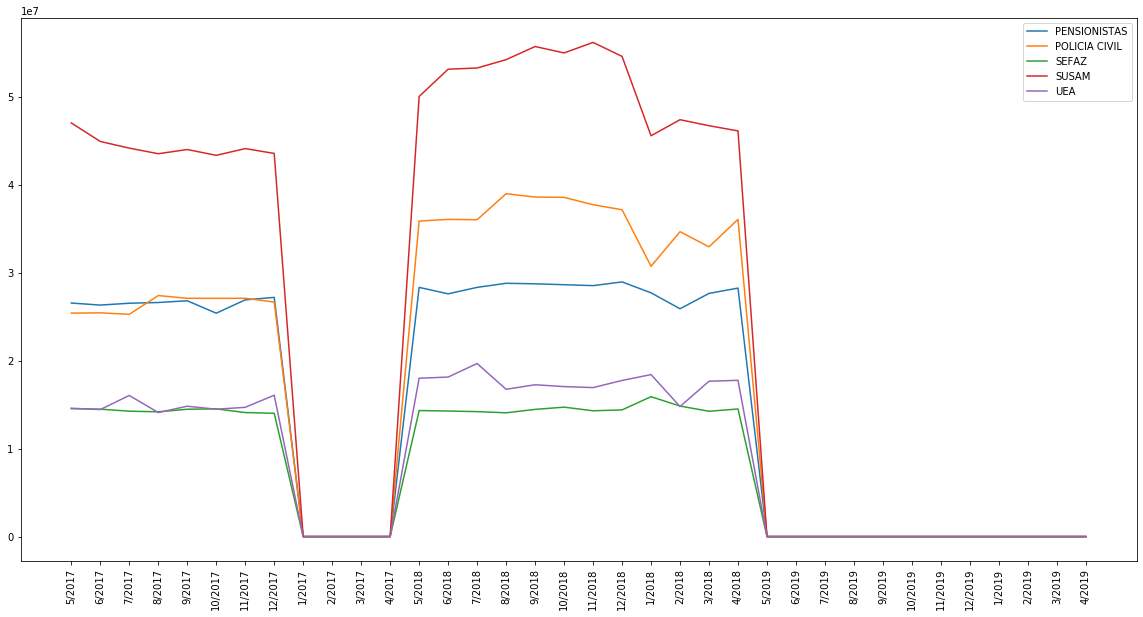

In [42]:
data = []
plt.figure(figsize=[20,10])
for orgao in orgaos:
    maior = 0
    orgao_tots = []
    
#     if(orgao != 'UEA' and orgao != 'SEAD'):
#         continue
        
    for ano in anos:
        
        if (ano < 2017):
            continue
#         print("###", ano)
        meses = rem_org['MES'].drop_duplicates()
        
        for mes in meses:
#             print("######", mes, end=': ')
            rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao) & (rem_org['MES'] == mes)]
            rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
            rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
            if (rem > maior):
                maior = rem
#             print(rem)
            orgao_tots.append(rem)
            data.append(str(mes) + "/" + str(ano))
#     print(maior)
    if (maior >= 10000000 and maior < 100000000):
        print(orgao)
        plt.plot(orgao_tots, label = orgao)
        plt.legend(loc=0)
        ax = plt.xticks(range(len(orgao_tots)),data, rotation = 90)

## Remuneração total por órgão em 2017

In [90]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].sum()
#             print(rem)
        data.append(rem)
        

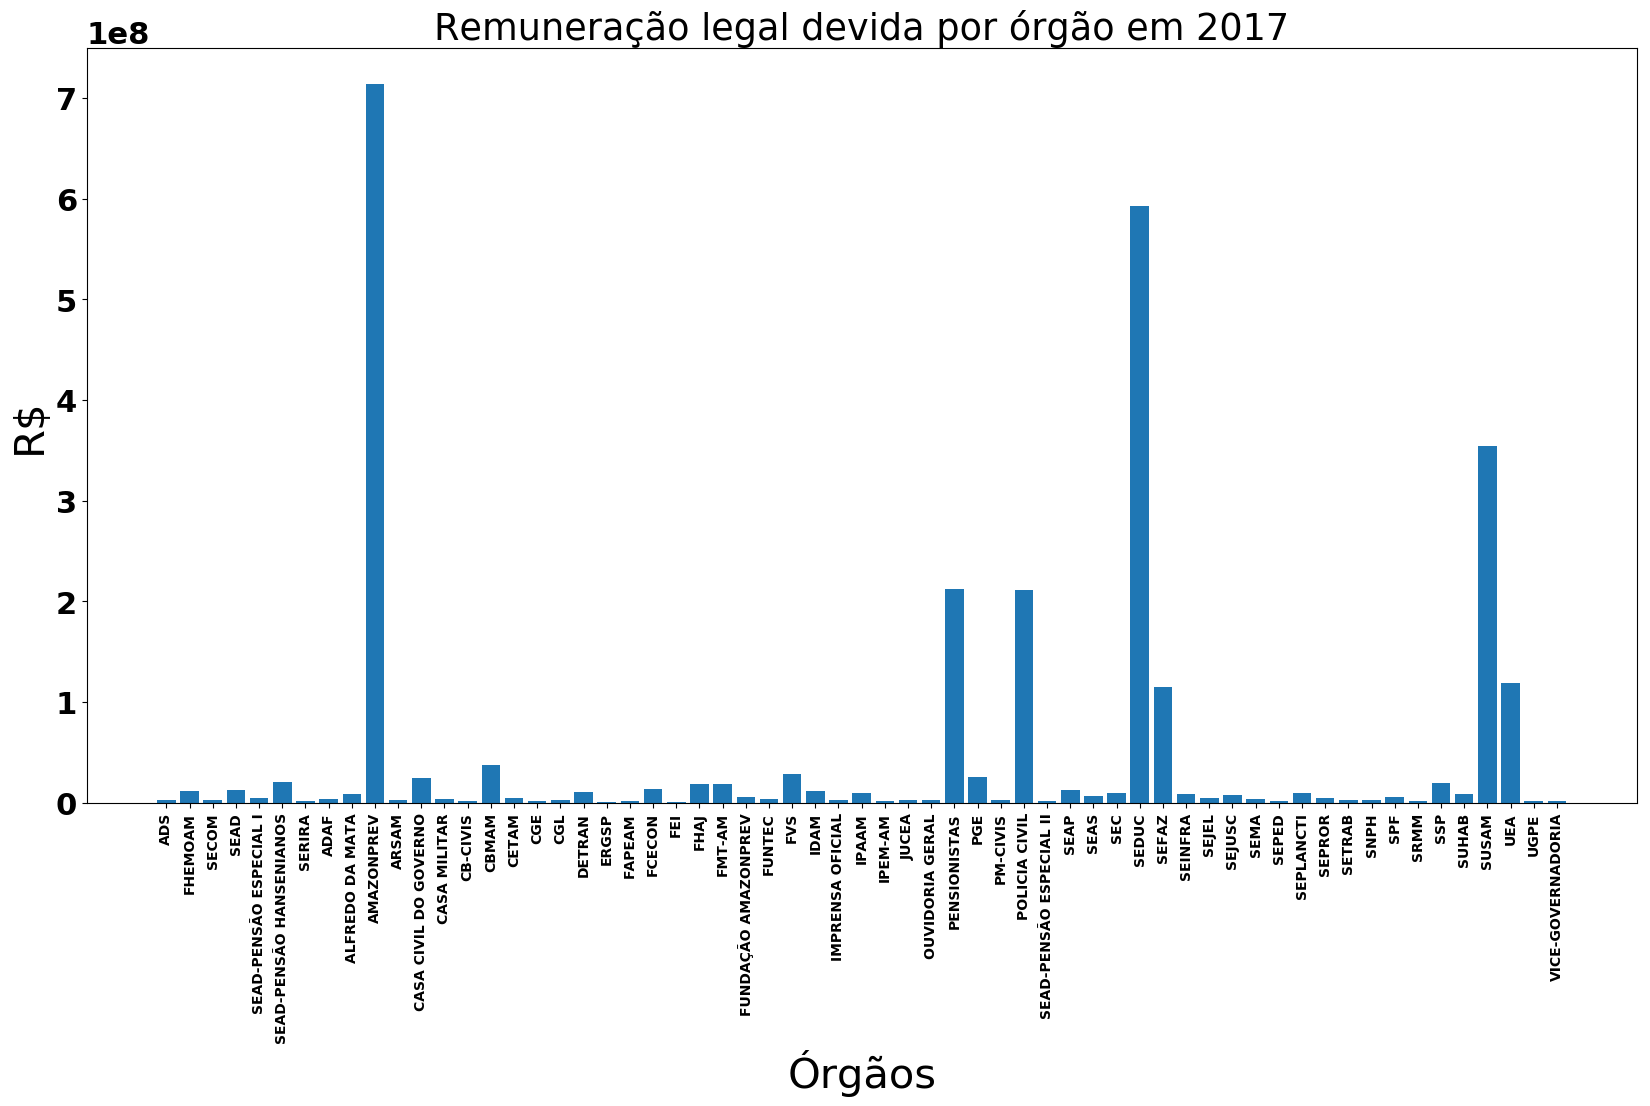

In [93]:
plot_bar('Remuneração legal devida por órgão em 2017',orgaos, data, 'Órgãos', 'R$')

## Numero de funcionarios por órgão em 2017

In [98]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].count()
#             print(rem)
        data.append(rem)
        

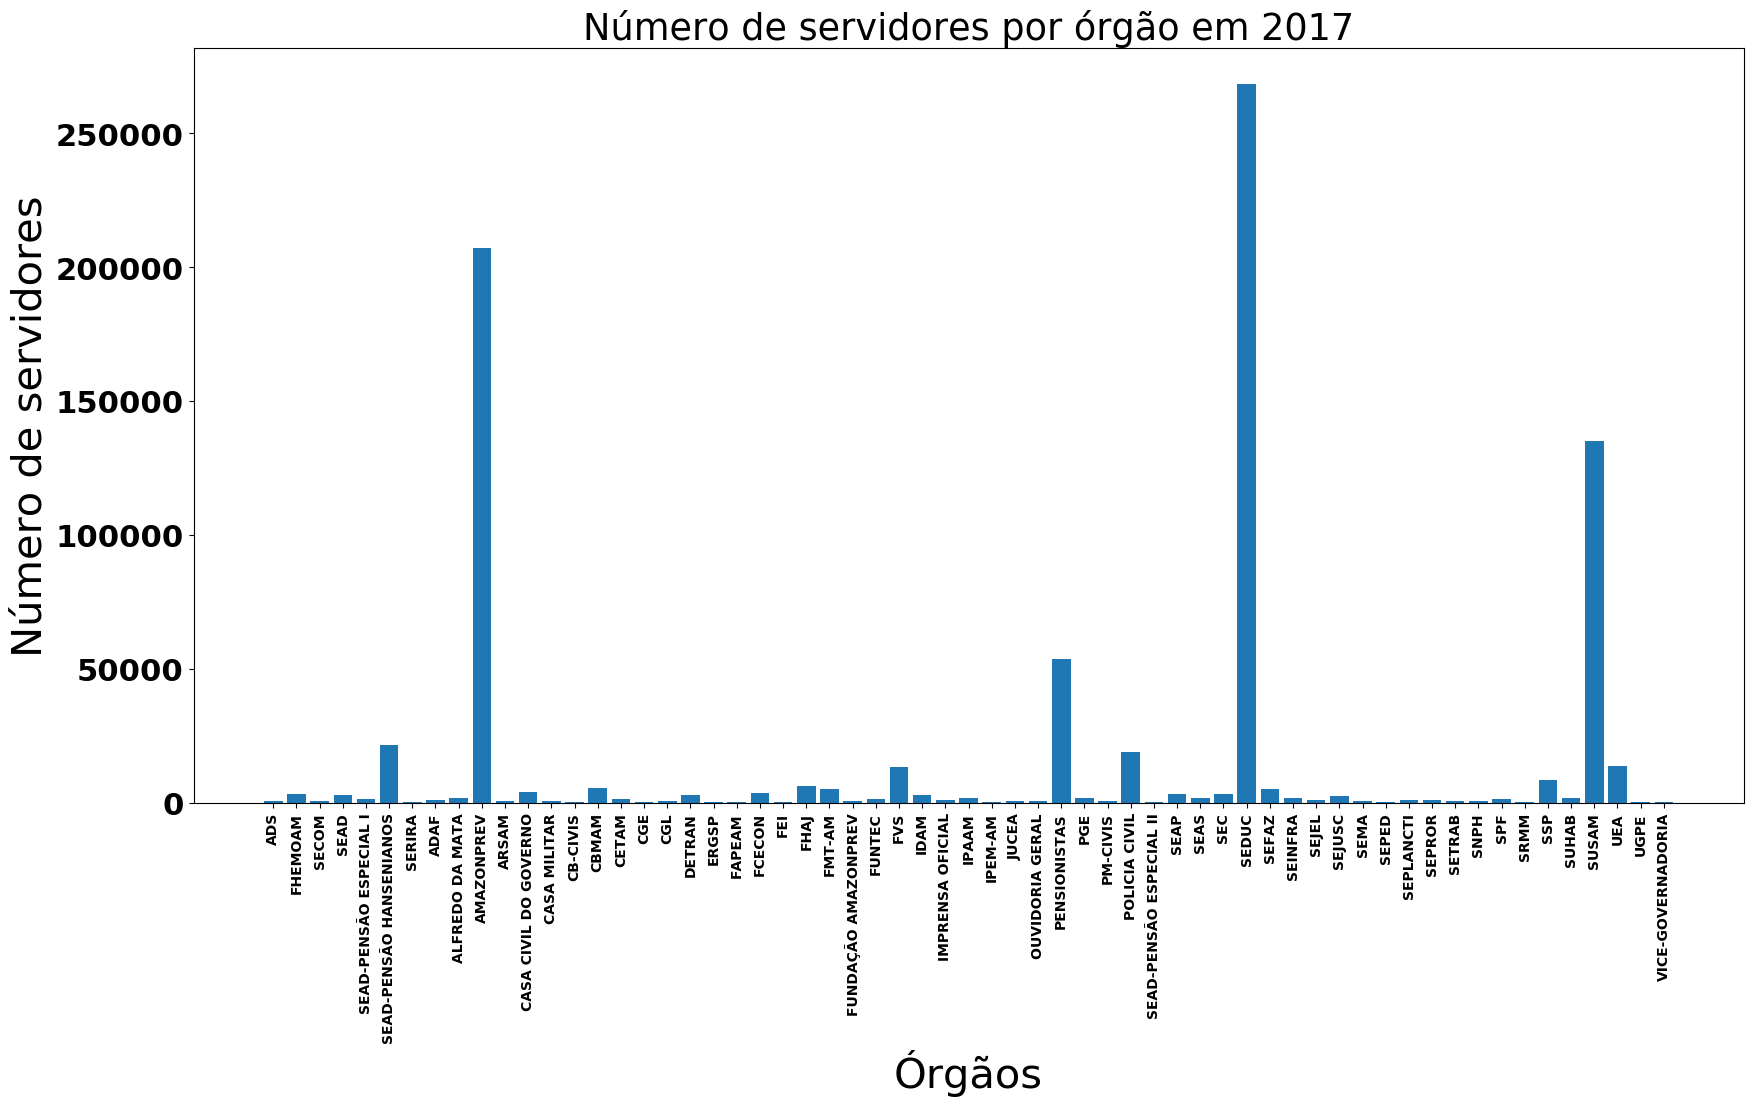

In [99]:
plot_bar('Número de servidores por órgão em 2017', orgaos, data, 'Órgãos', 'Número de servidores')

## Maior remuneração de cada órgão em 2017

In [96]:
data = []
for orgao in orgaos:
    orgao_tots = []
    for ano in anos:
        if (ano != 2017):
            continue
#         print("###", ano)
        rem = rem_org[(rem_org['ANO'] == ano) & (rem_org['ORGAO'] == orgao)]
        rem = rem[['REMUNERACAO LEGAL DEVIDA(R$)', 'ORGAO']]
        rem = rem['REMUNERACAO LEGAL DEVIDA(R$)'].max()
#             print(rem)
        data.append(rem)
        

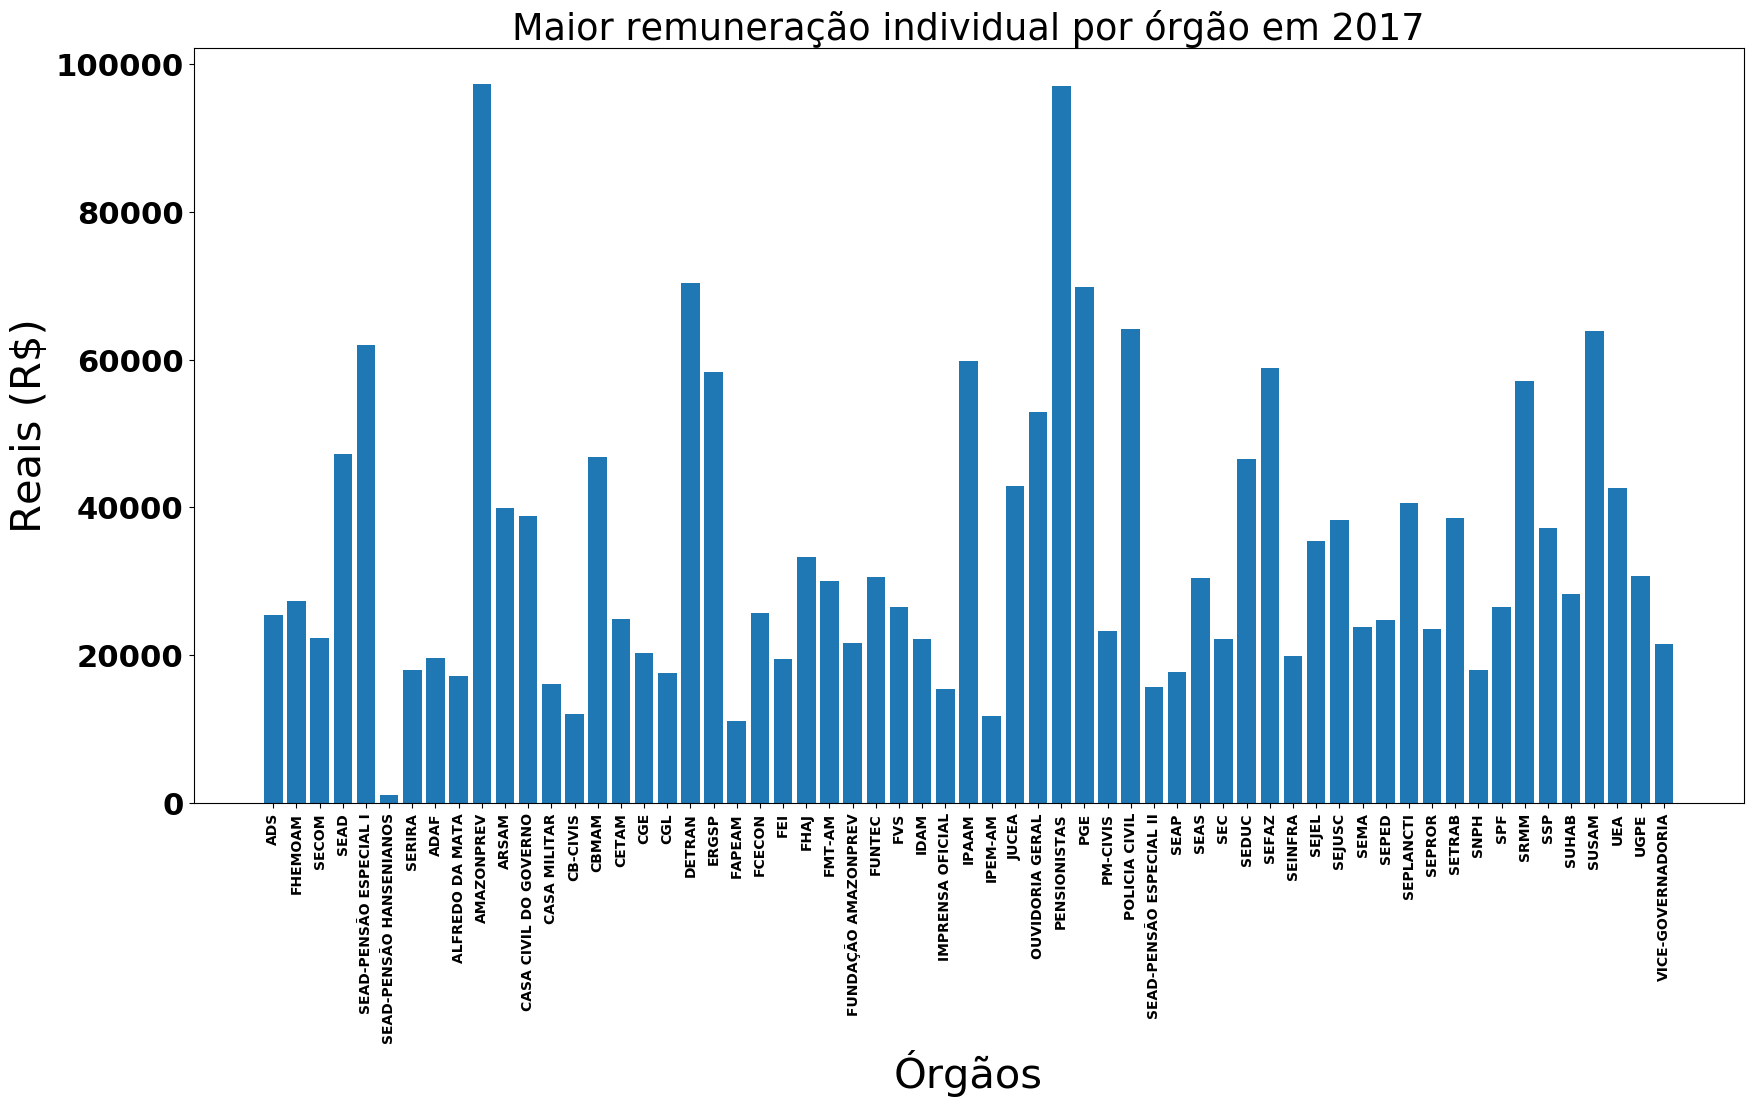

In [97]:
plot_bar('Maior remuneração individual por órgão em 2017', orgaos, data, 'Órgãos', 'Reais (R$)')

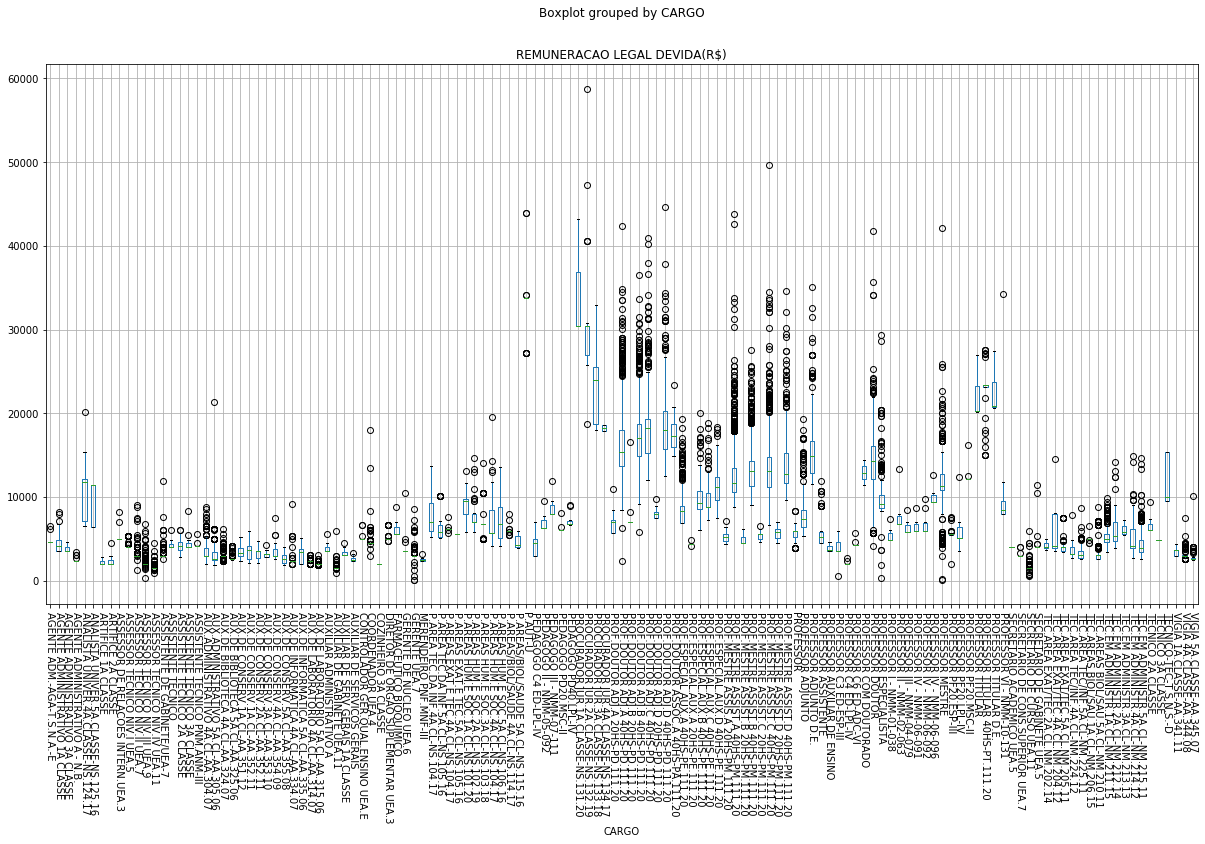

In [50]:
rem_plot = rem_org[rem_org['ORGAO'] == 'UEA']

rem_plot.boxplot(column='REMUNERACAO LEGAL DEVIDA(R$)', by='CARGO', figsize=(20,10), rot=-90)

<Figure size 1440x720 with 0 Axes>

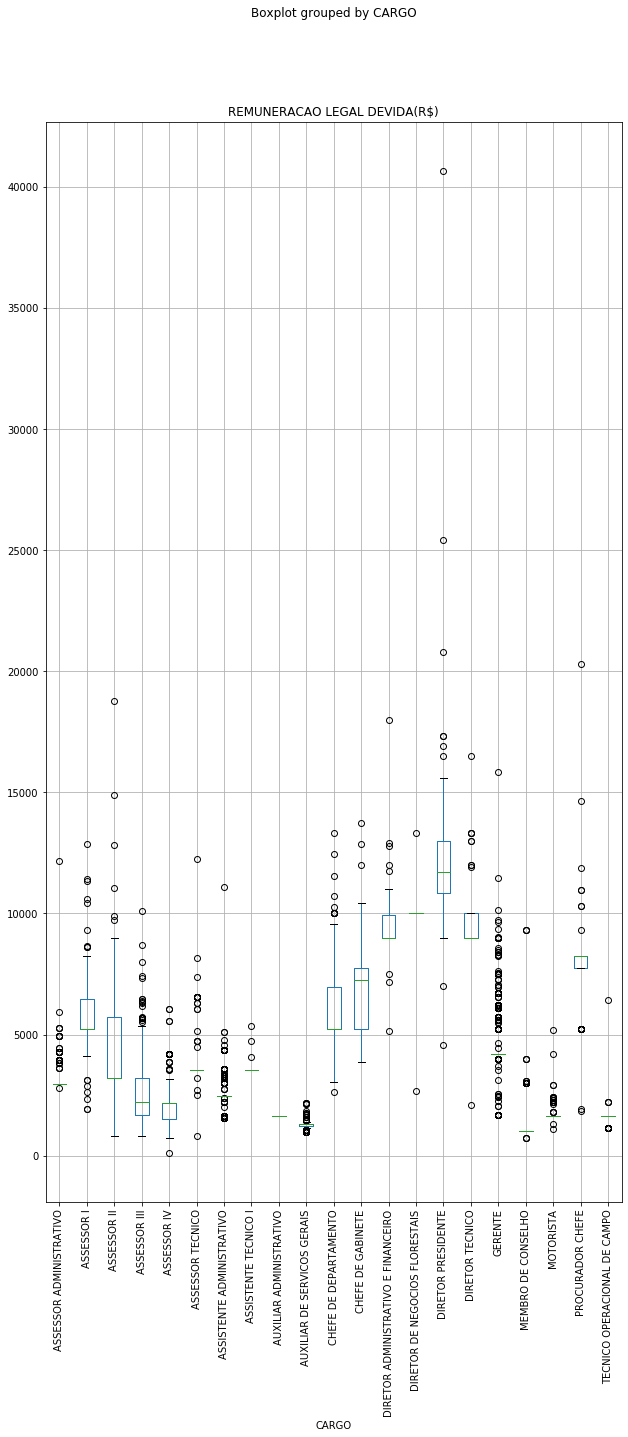

In [52]:
plt.figure(figsize=(20,10))
for orgao in orgaos:
#     print(orgao, end=', ')
    rem_plot = rem_org[rem_org['ORGAO'] == orgao]
#     print(rem_plot)
    rem_plot = rem_plot[['REMUNERACAO LEGAL DEVIDA(R$)','FUNCAO','ORGAO', 'CARGO']]
#     rem_plot = rem_plot.groupby('CARGO').sum()
#     print(rem_plot)
    rem_plot.boxplot(by='CARGO', column='REMUNERACAO LEGAL DEVIDA(R$)', figsize=(10,20), rot=90)
    break

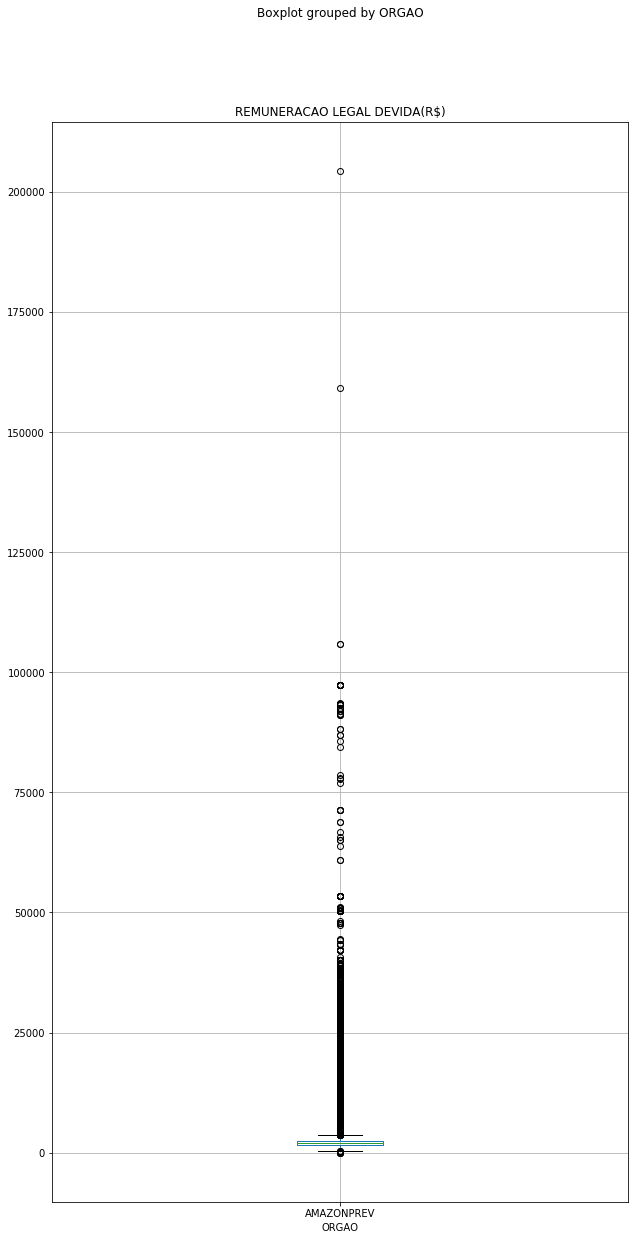

In [53]:
rem_plot = rem_org[rem_org['ORGAO'] == 'AMAZONPREV']
rem_plot = rem_plot[['REMUNERACAO LEGAL DEVIDA(R$)','ORGAO']]
rem_plot.boxplot(column='REMUNERACAO LEGAL DEVIDA(R$)', by='ORGAO', figsize=(10,20))

In [150]:
diretor = rem_org[(rem_org['CARGO'] == 'DIRETOR PRESIDENTE') & (rem_org['REMUNERACAO LEGAL DEVIDA(R$)'] > 40000)]
diretor

,REMUNERACAO LEGAL DEVIDA(R$),ANO,CARGO,DESC.TETO(R$),DESCONTOS LEGAIS(R$),FUNCAO,LIQUIDO DISPONIVEL(R$),LOTACAO,MES,NOME,ORGAO,REMUNERACAO LEGAL TOTAL(R$),VINCULO
2339911,40654.84,2016,DIRETOR PRESIDENTE,0.0,1182.11,-,39472.73,PRESIDENCIA,5,MIBERWAL FERREIRA JUCA,ADS,40654.84,C.L.T.


## Área de Testes

61
ORGAO     ADAF        ADS  ALFREDO DA MATA  AMAZONPREV  ARSAM  \
ANO  MES                                                        
2014 1     NaN  287278.25              NaN         NaN    NaN   
     2     NaN  286131.11              NaN         NaN    NaN   
     3     NaN  270896.87              NaN         NaN    NaN   
     4     NaN  266718.03              NaN         NaN    NaN   
     5     NaN  262246.37              NaN         NaN    NaN   
     6     NaN  270265.18              NaN         NaN    NaN   
     7     NaN  268949.31              NaN         NaN    NaN   
     8     NaN  258855.11              NaN         NaN    NaN   
     9     NaN  267989.93              NaN         NaN    NaN   
     10    NaN  267005.17              NaN         NaN    NaN   

ORGAO     CASA CIVIL DO GOVERNO  CASA MILITAR  CB-CIVIS  CBMAM  CETAM  ...  \
ANO  MES                                                               ...   
2014 1                      NaN           NaN       NaN    N

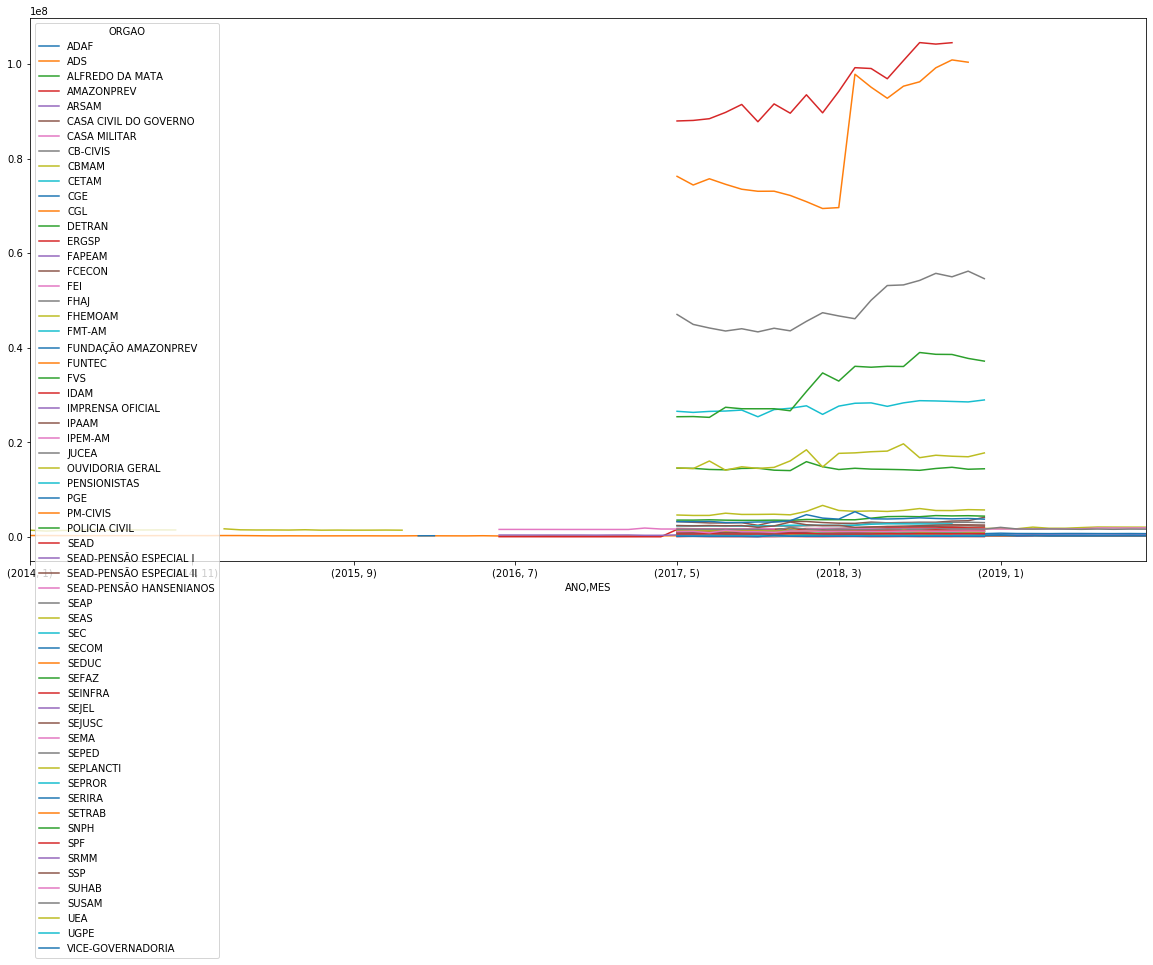

In [46]:
print(rem_org['ORGAO'].nunique())

# condicional = rem_org['REMUNERACAO LEGAL DEVIDA(R$)'].max() > 100000000
# rem_plot = rem_org[condicional]

rem_plot = rem_org.groupby(['ANO', 'MES', 'ORGAO'])['REMUNERACAO LEGAL DEVIDA(R$)']
# print(rem_sum)
rem_sum = rem_plot.sum().unstack()
print(rem_sum.head(10))
# maximos = rem_sum.
rem_sum.plot(kind='line', figsize=(20,10), legend=True)

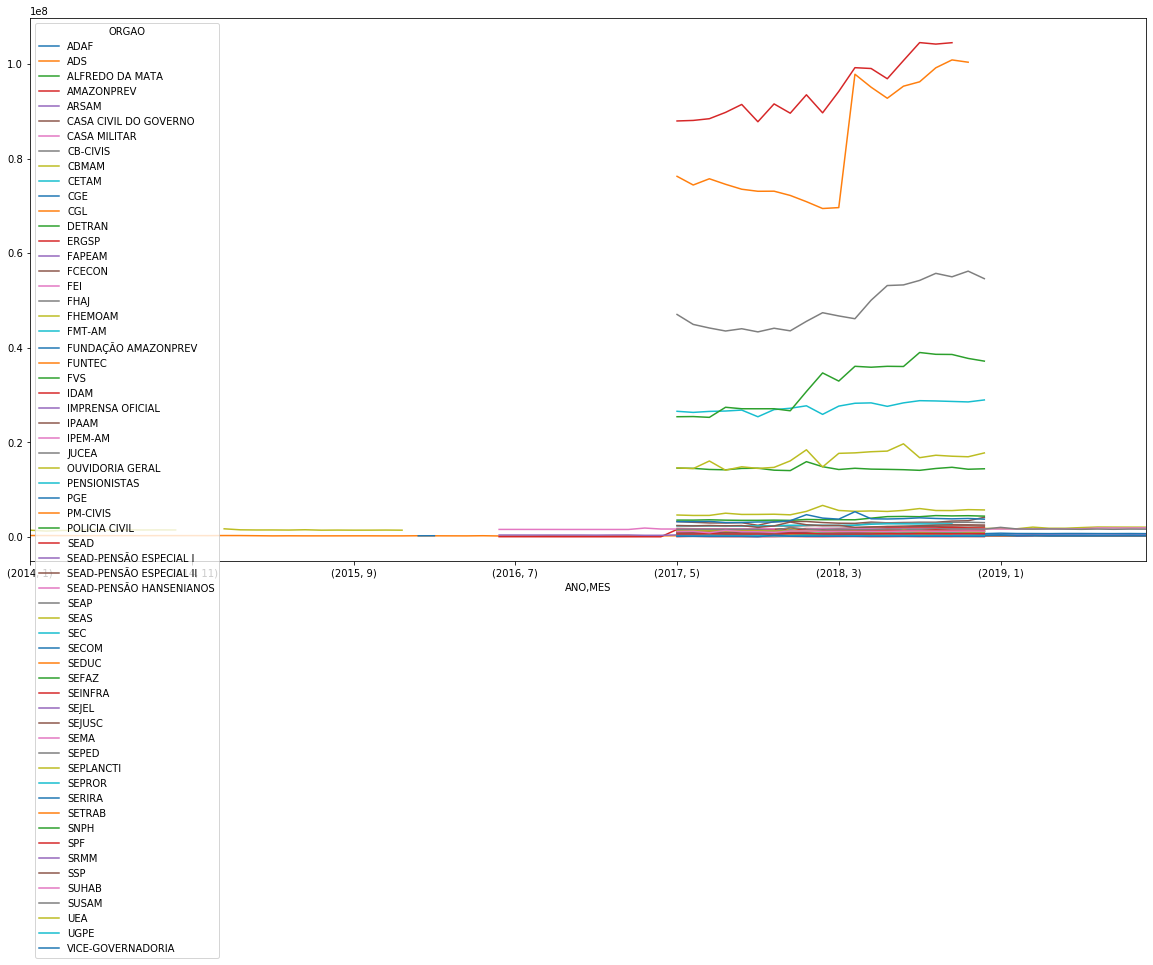

In [50]:
# condicional = rem_org['REMUNERACAO LEGAL DEVIDA(R$)'] > 1000000000
# rem_plot = rem_org[condicional]
rem_plot = rem_org.groupby(['ANO', 'MES', 'ORGAO' ])['REMUNERACAO LEGAL DEVIDA(R$)']

# rem_plot = rem_plot[condicional]
rem_sum = rem_plot.sum().unstack()
# rem_plot = rem_plot[]
# rem_plot = rem_plot['REMUNERACAO LEGAL DEVIDA(R$)']

# print(rem_sum)
# fig, ax = plt.subplots(figsize=(20,10))
# rem_plot.set_index('REMUNERACAO LEGAL DEVIDA(R$)', inplace=True)
# print(rem_sum.info())
# print(rem_sum.filter(lambda x:x > 100000))

# for num in rem_sum:
#     print(num)

# maiores = np.where(rem_plot['REMUNERACAO LEGAL DEVIDA(R$)'] > 100000000)
rem_sum.plot(kind='line', figsize=(20,10), legend=True)
# rem_sum.head()